# Remote Work and Mental Health


How do the number of hours worked per week and regional differences impact employee productivity in remote work environments in North America vs. Asia?

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [24]:
df = pd.read_csv('../resources/Impact_of_Remote_Work_on_Mental_Health.csv')
df.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


In [25]:
North_AmericaDF = df[df["Region"] == 'North America']  
#print(North_AmericaDF)

In [26]:
AsiaDF = df[df["Region"] == 'Asia']  
#print(AsiaDF)

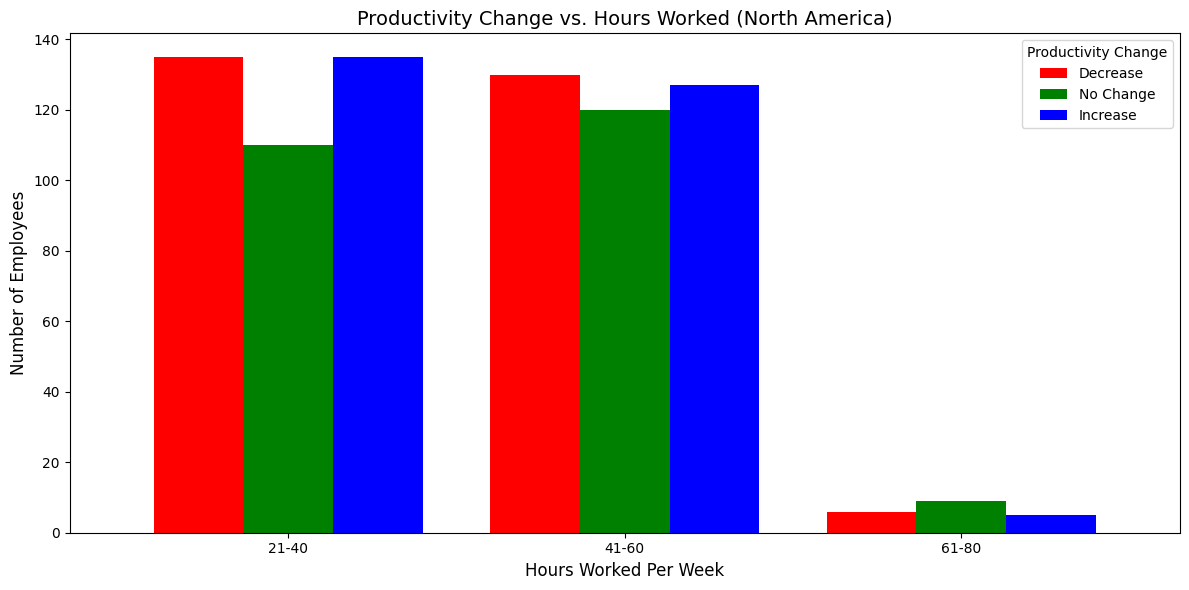

In [27]:
# Filter for North America
north_america_data = df[df['Region'] == 'North America'].copy()
# Bin hours worked into ranges
bins = [0, 20, 40, 60, 80]
bin_labels = ['0-20', '21-40', '41-60', '61-80']
north_america_data['Hours_Worked_Bins'] = pd.cut(
    north_america_data['Hours_Worked_Per_Week'], bins=bins, labels=bin_labels, right=False
)
# Group data by hours worked bins and productivity change
grouped_data = north_america_data.groupby(['Hours_Worked_Bins', 'Productivity_Change'], observed=True).size().unstack(fill_value=0)
# Plot a binned bar chart
grouped_data.plot(kind='bar', figsize=(12, 6), width=0.8, color = ['red', 'green', 'blue'])
# Customize the chart
plt.title("Productivity Change vs. Hours Worked (North America)", fontsize=14)
plt.xlabel("Hours Worked Per Week", fontsize=12)
plt.ylabel("Number of Employees", fontsize=12)
plt.xticks(rotation=0)  # Rotate x-axis labels for readability
plt.legend(title="Productivity Change", labels=['Decrease', 'No Change', 'Increase'])
# Show the plot
plt.tight_layout()
plt.savefig("ProductivityChange_vs_HoursWorked_NorthAmerica.png")
plt.show()

## North America Analysis:

On average in North America employees who report working between 21-40 hours per week report the highest productivity increases. The employees who reported working 61-80 hours per week reported mostly no change in productivity and very little in increased productivity. The sample size for the employees that worked between 61-80 hours a week in North America is small and therefore does not provide clear conclusions. This can depict problems like burn out and reduced efficiancy.

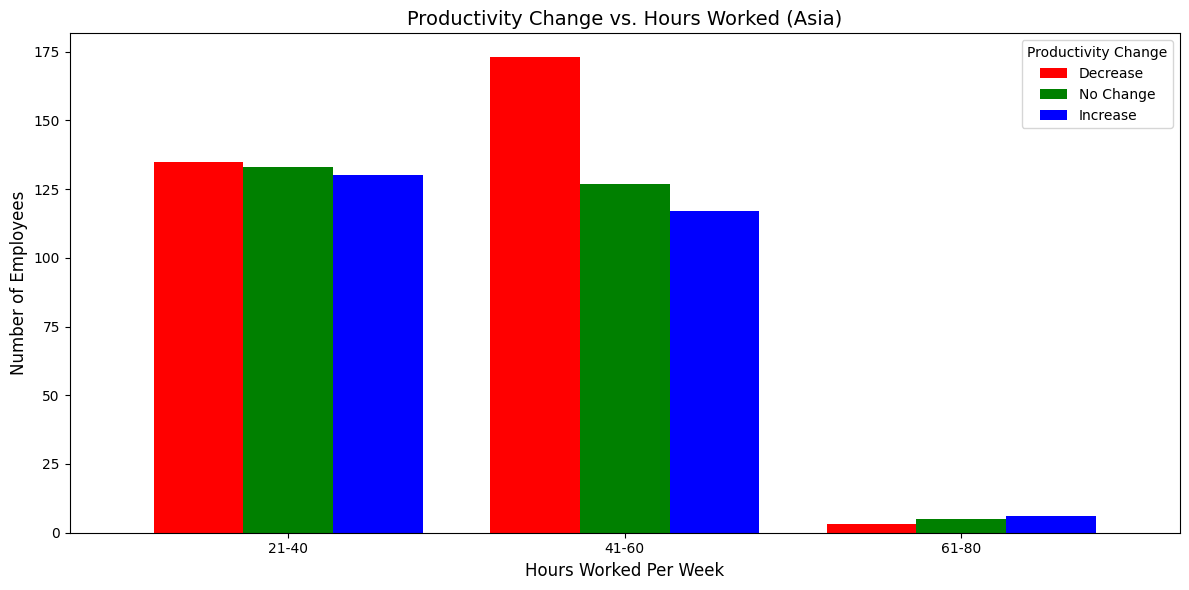

In [28]:
# Filter for Asia
asia_data = df[df['Region'] == 'Asia'].copy()
# Bin hours worked into ranges
bins = [0, 20, 40, 60, 80]
bin_labels = ['0-20', '21-40', '41-60', '61-80']
asia_data['Hours_Worked_Bins'] = pd.cut(
    asia_data['Hours_Worked_Per_Week'], bins=bins, labels=bin_labels, right=False
)
# Group data by hours worked bins and productivity change
grouped_data = asia_data.groupby(['Hours_Worked_Bins', 'Productivity_Change'], observed=True).size().unstack(fill_value=0)
# Plot a binned bar chart
grouped_data.plot(kind='bar', figsize=(12, 6), width=0.8, color = ['red', 'green', 'blue'])
# Customize the chart
plt.title("Productivity Change vs. Hours Worked (Asia)", fontsize=14)
plt.xlabel("Hours Worked Per Week", fontsize=12)
plt.ylabel("Number of Employees", fontsize=12)
plt.xticks(rotation=0)  # Rotate x-axis labels for readability
plt.legend(title="Productivity Change", labels=['Decrease', 'No Change', 'Increase'])
# Show the plot
plt.tight_layout()
plt.savefig("ProductivityChange_vs_HoursWorked_Asia.png")
plt.show()

## Asia Analysis :

Key Observations

- Productivity generally trends downward as weekly hours increase beyond 40.
- In Asia, employees who reported working 21-40 hours per week displayed similar levels of productivity.
- Most Asian employees report decreased productivity or no gains when working over 41 hours per week, highlighting potential burnout or inefficiency at higher workloads.
- The small sample size for employees working 61-80 hours makes it difficult to draw concrete conclusions for this segment.

Recommendation
- Organizations should monitor and limit work hours to optimize productivity and support employee well-being.

## Regional Comparison :

The bar charts analyzing Productivity Change versus Hours Worked Per Week for North America and Asia reveal distinct regional trends. In North America, productivity changes are relatively balanced across the 21-40 and 41-60 hour bins, with many employees reporting "No Change" or an "Increase" in productivity. In contrast, Asia shows a greater occurrence of "Decrease" in productivity within these same hour ranges, indicating potential challenges associated with longer working hours in remote settings. 

Both regions have minimal representation in the 61-80 hour bin, suggesting that few employees work extensive hours. Despite this, productivity outcomes in this category vary significantly. North America shows more stable and positive productivity trends, while Asia has more variation and challenges. This could be due to differences in culture, workplace practices, or resources. These results suggest the importance of creating remote work policies and support systems that are tailored to the unique needs of each region.